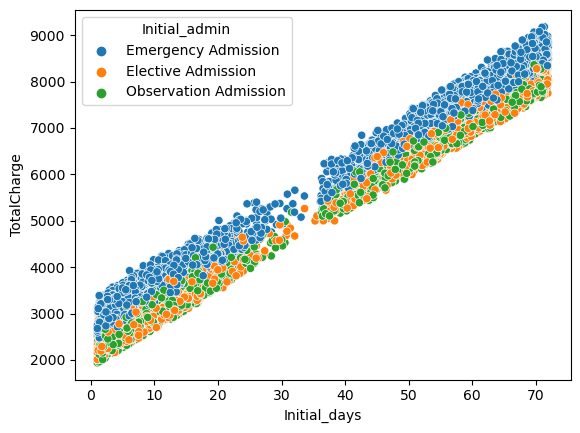

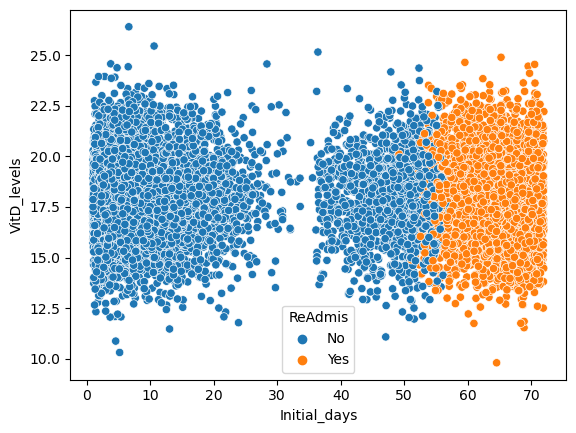

 Data has been prepared     
RANDOM FORESTS:
(10000, 29)
(10000,)
(3000,)
3000
Score 3  Of:  3000
Test set RMSE of rf: 1152.22
Test Mean Absolute Error 1039.79
Train vs Test MAES
Model error on seen data: 1045.96.
Model error on unseen data: 1039.79.


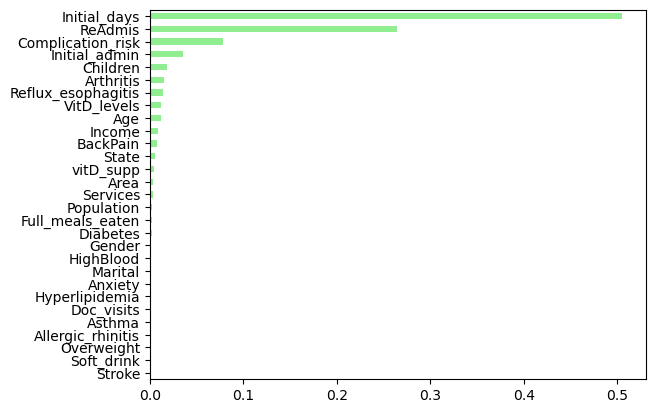

Top Features Causing TotalCharge:
ReAdmis: 0.26
Complication_risk: 0.08
Initial_days: 0.51


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as mae

from sklearn.metrics import roc_auc_score

path='/Users/herlihpj/Desktop/Data Analytics/D209 - Data Mining/Task 2/'

#Data Preparation
#Reads CSV to data frame, sets case order to index
med_dirty= pd.read_csv(path+'medical_clean.csv', 
                         index_col=0)
#Check for Null
print('Summary of Null: ')
print(med_dirty.isna().sum())

#Check for duplicated data
duplicates=med_dirty.duplicated()
print('Duplicates: ;', duplicates.sum())

# Dropping columns not relavant to the analysis
med_mine = med_dirty.drop(columns= ["Customer_id", "Interaction",'TimeZone', "UID", "City", "County", "Zip", "Lat",
                            "Lng",'Job','Item1','Item2', 'Item3','Item4','Item5','Item6','Item7','Item8']) 
                            #,'TotalCharge','Additional_charges','ReAdmis'
#Visualize Realationships
sns.scatterplot(data=med_mine, x="Initial_days", y="TotalCharge", hue='Initial_admin')
plt.show()
sns.scatterplot(data=med_mine, hue="ReAdmis", x="Initial_days", y='VitD_levels')
plt.show()

#Ordinal Encoding to convert to numeric 0:No, 1:Yes; other variable alphabetically starting with 0
oe_dict={}
#list of columns to convert to numerical
convert_cols=['State','Area','Services', 'Marital', 'Gender','Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke', 
              'Complication_risk','Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia','BackPain', 'Anxiety',
             'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services','ReAdmis']#
for col_name in convert_cols:
    #print(col_name+' pre: '+str(med_mine[col_name].unique()))
    #Creates column ordinal encoder
    oe_dict[col_name]=OrdinalEncoder()
    col=med_mine[col_name]
    #select non-null values of col
    col_not_null=col[col.notnull()]
    reshaped_vals=col_not_null.values.reshape(-1,1)
    encoded_vals=oe_dict[col_name].fit_transform(reshaped_vals)
    med_mine.loc[col.notnull(), col_name]=np.squeeze(encoded_vals)
    #print(col_name+' post: '+str(med_mine[col_name].unique()))
    
#Visual EDA - wouldnt plot with color y?
#_= pd.plotting.scatter_matrix(med_mine, c = 'green', figsize = [8, 8],s=150, marker = 'D')
#returns a series of plots and histograms
#Slow runtime too many graphs with this data

#Various Countplots to Visualize data


#med_mine.to_csv(path+'Prepared_data.csv')    
#print('Prepared Data has been exported to CSV')
    
print('======================= \n Data has been prepared     \n======================= ')

    
### RANDOM FOREST REGRESSION ###
print('RANDOM FORESTS:')
target='Initial_days'
med_mine=med_mine.drop(columns = ['Additional_charges'])#

#Train/test Split
X=med_mine.drop(target, axis=1)#.values #can drop readmis too doesnt change anything
y=med_mine[target]
#Check to make sure target has same numer of rows and just one value
print(X.shape)
print(y.shape) 

# Set seed for reproducibility
SEED = 1
# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=SEED)

# Instantiate a random forests regressor 'rf' 400 estimators
rf = RandomForestRegressor(n_estimators=100, min_samples_leaf= 0.08, max_features='sqrt', max_depth=4, random_state=SEED)
# Fit 'rf' to the training set
rf.fit(X_train, y_train)
# Predict the test set labels 'y_pred'
y_pred = rf.predict(X_test)

print(y_test.shape)
print(len(y_pred))
Score=0
for x, pred in enumerate(y_pred):
    test_min=y_test.iloc[x]-14
    test_max=y_test.iloc[x]+14
    #print('Correct: ',y_test.iloc[x], ' Predicted: ', pred)
    if pred>test_min and pred<test_max:
        Score=Score+1
print('Score', Score, ' Of: ', len(y_pred))


# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)
# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))
#Print the test set MAE 
print("Test Mean Absolute Error {0:.2f}".format(mae(y_true=y_test, y_pred=y_pred)))

##
print('Train vs Test MAES')
# Create vectors of predictions
train_predictions = rf.predict(X_train)
test_predictions = rf.predict(X_test)
# Train/Test Errors
train_error = mae(y_true=y_train, y_pred=train_predictions)
test_error = mae(y_true=y_test, y_pred=test_predictions)
# Print the accuracy for seen and unseen data
print("Model error on seen data: {0:.2f}.".format(train_error))
print("Model error on unseen data: {0:.2f}.".format(test_error))
##

# Feature Importance 
import pandas as pd
import matplotlib.pyplot as plt
# Create a pd.Series of features importances
importances_rf = pd.Series(data=rf.feature_importances_,index=X.columns)
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='lightgreen'); plt.show()
#Plots a horizontal bar graph with each features importance

#Can also store and sort the importances first then loop through
print('Top Features Causing '+target+':')
for i, item in enumerate(rf.feature_importances_):
    if (item>.05):
        print("{0:s}: {1:.2f}".format(X.columns[i], item))
        
